# Pixel matrices: more examples

This notebook reproduces further examples from the pixel arrays paper
([arXiv:1609.00061](https://arxiv.org/abs/1609.00061)).

In [1]:
using Catlab, Catlab.CategoricalAlgebra.FinRelations

using Convex, SCS, TikzPictures
using Plots

plot_rel(m::AbstractMatrix{BoolRig}; kw...) =
  plot(spy(map(x -> x.value, m)); kw...)

plot_rel (generic function with 1 method)

## Example 2.4.1

$ R_1(x; z) \iff \cos(\log(z^2 + 10^{-3} x)) - x + 10^{-5} z^{-1} = 0 $

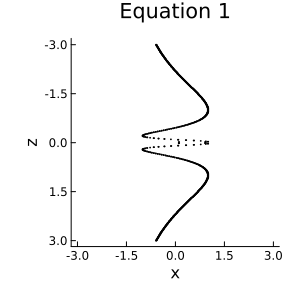

In [2]:
dim = 500
w = y = x = z = range(-3, 3, length=dim)
ϵ = (maximum(w) - minimum(w)) / dim

R1_mat = FinRelation(Matrix{BoolRig}(
  @. abs(cos(log(Complex(z^2 + 10^-3 * x'))) - x' + 10^-5 / z) < ϵ
))

ticks = range(1, dim, length=5)
ticklabels = range(-3, 3, length=length(ticks))
plot_rel(R1_mat.rel, title="Equation 1", xlabel="x", ylabel="z",
         size=(300,300), lims=(0,dim), ticks=(ticks,ticklabels))

$ R_2(w; y) \iff \cosh(w + 10^{-3} y) + y + 10^{-4} w = 2 $

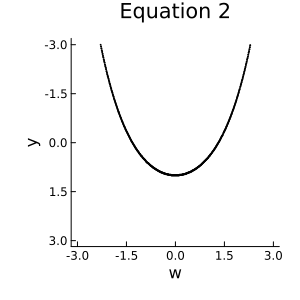

In [3]:
R2_mat = FinRelation(Matrix{BoolRig}(
  @. abs(cosh(w' + 10^-3 * y) + y + 10^-4 * w' - 2) < ϵ
))

plot_rel(R2_mat.rel, title="Equation 2", xlabel="w", ylabel="y",
         size=(300,300), lims=(0,dim), ticks=(ticks,ticklabels))

$ R_3(x; y) \iff \tan(x+y) (x-2)^{-1} (x+3)^{-1} y^{-2} = 1 $

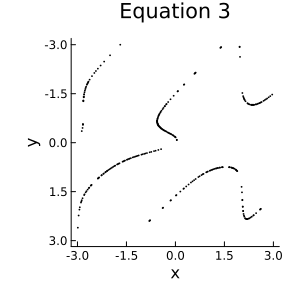

In [4]:
R3_mat = FinRelation(Matrix{BoolRig}(
  @. abs(tan(x'+y) / (x'-2) / (x'+3) / y^2 - 1) < ϵ
))

plot_rel(R3_mat.rel, title="Equation 3", xlabel="x", ylabel="y",
         size=(300,300), lims=(0,dim), ticks=(ticks,ticklabels))

Compute and plot the composite relation.

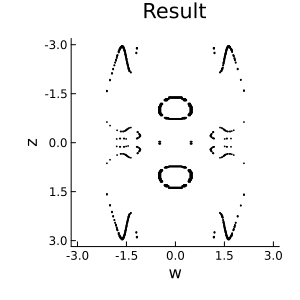

In [5]:
W, X, Y, Z = Ob(FreeBicategoryRelations, "w", "x", "y", "z")
R1 = Hom("R_1", X, Z)
R2 = Hom("R_2", W, Y)
R3 = Hom("R_3", X, Y)

composite = R2 ⋅ dagger(R3) ⋅ R1

to_tikz(composite, orientation=LeftToRight, labels=true)

ob = FinRel(dim)
composite_mat = functor((FinRel, FinRelation), composite, generators=Dict(
  W => ob, X => ob, Y => ob, Z => ob,
  R1 => R1_mat, R2 => R2_mat, R3 => R3_mat,
))

plot_rel(composite_mat.rel, title="Result", xlabel="w", ylabel="z",
         size=(300,300), lims=(0,dim), ticks=(ticks,ticklabels))

## Example 2.4.2

$$
\begin{aligned}
   R_1(w; y,x) &\iff \tan(y+w) + \exp(x) = 2 \\
   R_2(x,v; y) &\iff x^3 + \cos(\log(y^2)) = 1.5v \\
   R_3(w; v,z) &\iff w + z + 10^{-1} v = 0.5
\end{aligned}
$$

In [6]:
V, W, X, Y, Z = Ob(FreeBicategoryRelations, "v", "w", "x", "y", "z")
R1 = Hom("R_1", W, Y⊗X)
R2 = Hom("R_2", X⊗V, Y)
R3 = Hom("R_3", W, V⊗Z)

composite = mcopy(W)⋅(R1 ⊗ R3)⋅(id(Y) ⊗ R2 ⊗ delete(Z))⋅mmerge(Y)

mcopy{w}⋅(R_1⊗R_3)⋅(id{y}⊗R_2⊗delete{z})⋅mmerge{y}: w → y

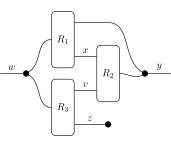

In [7]:
to_tikz(composite, orientation=LeftToRight, labels=true)